In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
from scipy.linalg import circulant
from numpy import linalg as LA
import preprocess as pr
from keras.preprocessing import sequence
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Input,Conv1D,MaxPooling1D,Flatten,LSTM,Dropout,BatchNormalization,Activation,Concatenate
import hickle as hkl
from keras.preprocessing import sequence
import re
from sklearn import preprocessing

Using TensorFlow backend.


In [3]:
os.chdir("/Polycarbon/hand Motion Clasification")

# Final release model

In [3]:
def build_model2(window_length,feature_length):
    input_signal = Input(shape=(window_length,feature_length),name="input_signal")
    x = Conv1D(filters=32, kernel_size=3,activation='relu', padding='same')(input_signal)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(filters=16, kernel_size=200,activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(filters=8, kernel_size=200,activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2, padding='same')(x)
    
    x = Flatten()(x)
   # x = Dropout(0.5)(x)
    x = Dense(output_dim = 80, init = 'uniform', activation = 'relu')(x)
    dense_out = Dense(17, activation="sigmoid" ,name ="output_Dense")(x)
    
    model=Model(inputs=[input_signal], outputs=[dense_out])
        
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [4]:
x=[]
y=[]
for sample_file in os.listdir("Trimed data/"):
    d= hkl.load("Trimed data/"+sample_file)
    x.extend(d["data"])
    y.extend(d["label"])
    print("success : "+sample_file)

y=np.array(y)
y[y=="14left"]="14l"
y[y=="15left"]="15l"
y[y=="14right"]="14r"
y[y=="15right"]="15r"
encoder = preprocessing.LabelEncoder()
encoder.fit(y)
y_e  = encoder.transform(y)
lenghts = [len(x[i][0][0]) for i in range(len(x))]
x=[x[i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]
y_e =[y_e [i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]

success : Amnoey.hkl
success : amnuay.hkl
success : ampai2.hkl
success : angkana.hkl
success : Aphinop.hkl
success : Aueporn.hkl
success : Bancha.hkl
success : Benjarat.hkl
success : Boonching.hkl
success : Buntean.hkl
success : Buntra.hkl
success : Charuves_Krasaerot.hkl
success : Chatri.hkl
success : Donsatid.hkl
success : Duangporn.hkl
success : Duenpen.hkl
success : dusid.hkl
success : Gulthida.hkl
success : Jamroen.hkl
success : Jamroen_Murangkerd.hkl
success : Jinda_Jaichuphan.hkl
success : Jiratchaya.hkl
success : Jittana Jaroenrak.hkl
success : Kamon.hkl
success : Karnda.hkl
success : Keawta.hkl
success : khanittha.hkl
success : kobkeaw.hkl
success : Ladawan.hkl
success : lamphueng.hkl
success : lamyong.hkl
success : laong krue.hkl
success : Lumyong.hkl
success : Mayuree.hkl
success : Mayuree2.hkl
success : Mink.hkl
success : Mongkhon.hkl
success : Napas.hkl
success : Narin.hkl
success : Narin_Prang.hkl
success : narumon.hkl
success : Nittaya.hkl
success : onsa.hkl
success : Or

In [5]:
XL=np.array([sequence.pad_sequences(b[0], padding="post",maxlen=2000,dtype='float32')for b in x])
XR=np.array([sequence.pad_sequences(b[1], padding="post",maxlen=2000,dtype='float32')for b in x])
X =np.concatenate((XL[:,16:,534:712], XR[:,16:,534:712]), axis=1)
del(XL,XR)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y_e,test_size=0.1,stratify=y_e)

model=build_model2(X.shape[1],X.shape[2])  
model.fit(X_train, pd.get_dummies(y_train), batch_size = 500, nb_epoch = 100)

C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/100
14089/14089 [==============================] - 50s 4ms/step - loss: 2.7626 - acc: 0.1364
Epoch 2/100
14089/14089 [==============================] - 1s 36us/step - loss: 2.5329 - acc: 0.2276
Epoch 3/100
14089/14089 [==============================] - 1s 36us/step - loss: 2.2129 - acc: 0.2944
Epoch 4/100
14089/14089 [==============================] - 1s 36us/step - loss: 1.9700 - acc: 0.3618
Epoch 5/100
14089/14089 [==============================] - 1s 36us/step - loss: 1.7602 - acc: 0.4327
Epoch 6/100
14089/14089 [==============================] - 1s 36us/step - loss: 1.5926 - acc: 0.4805
Epoch 7/100
14089/14089 [==============================] - 1s 36us/step - loss: 1.4461 - acc: 0.5311
Epoch 8/100
14089/14089 [==============================] - 1s 36us/step - loss: 1.3330 - acc: 0.5629
Epoch 9/100
14089/14089 [==============================] - 1s 36us/step - loss: 1.2130 - acc: 0.6087
Epoch 10/100
14089/14089 [==============================] - 1s 36us/step - loss: 1.1211 - a

In [7]:
scores = model.evaluate([X_test], pd.get_dummies(y_test))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1566/1566 [==============================] - 1s 520us/step

acc: 81.93%


Confusion matrix, without normalization
[[76  1  1  0  1  0  2  0  0  0  0  1  0  0  0  1  1]
 [ 1 82  0  0  0  0  0  1  0  0  0  1  1  2  0  1  2]
 [ 0  0 69  1  5  0  3  0  0  0  1  1  0  1  0  5  7]
 [ 0  4  0 81  0  0  0  2  0  2  0  2  0  1  2  0  1]
 [ 0  0  3  0 83  1  0  0  1  5  0  0  0  0  2  0  0]
 [ 0  1  0  0  2 75  1  6  3  1  0  5  0  0  0  1  1]
 [ 2  0  0  0  3  0 81  0  8  1  0  1  0  0  0  0  1]
 [ 0  0  1  1  1  2  1 81  4  0  0  2  0  0  0  0  2]
 [ 0  0  0  0  1  1  3  1 84  2  0  1  0  0  1  0  0]
 [ 0  0  1  2  8  1  0  2  0 71  1  3  1  0  2  1  1]
 [ 3  8  0  1  0  0  0  0  2  2 56  1  0  1  8  3  0]
 [ 3  1  0  3  1  1  2  3  0  1  0 74  0  0  1  1  2]
 [ 0  1  5  1  1  0  0  0  0  1  3  0 74  1  2  4  0]
 [ 1  3  1  0  0  2  2  0  0  0  1  1  1 72  0  9  0]
 [ 0  1  1  2  1  1  1  1  0  0  0  0  2  0 71  1  6]
 [ 1  1  3  0  0  0  0  0  1  1  1  0  1  2  1 68  9]
 [ 1  1  0  1  1  0  0  0  0  0  0  1  1  0  0  0 85]]


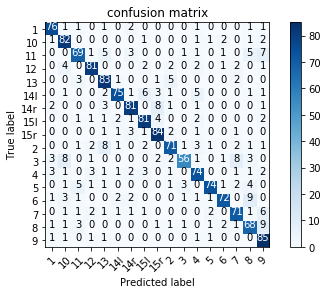

Normalized confusion matrix
[[0.9  0.01 0.01 0.   0.01 0.   0.02 0.   0.   0.   0.   0.01 0.   0.
  0.   0.01 0.01]
 [0.01 0.9  0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.01 0.01 0.02
  0.   0.01 0.02]
 [0.   0.   0.74 0.01 0.05 0.   0.03 0.   0.   0.   0.01 0.01 0.   0.01
  0.   0.05 0.08]
 [0.   0.04 0.   0.85 0.   0.   0.   0.02 0.   0.02 0.   0.02 0.   0.01
  0.02 0.   0.01]
 [0.   0.   0.03 0.   0.87 0.01 0.   0.   0.01 0.05 0.   0.   0.   0.
  0.02 0.   0.  ]
 [0.   0.01 0.   0.   0.02 0.78 0.01 0.06 0.03 0.01 0.   0.05 0.   0.
  0.   0.01 0.01]
 [0.02 0.   0.   0.   0.03 0.   0.84 0.   0.08 0.01 0.   0.01 0.   0.
  0.   0.   0.01]
 [0.   0.   0.01 0.01 0.01 0.02 0.01 0.85 0.04 0.   0.   0.02 0.   0.
  0.   0.   0.02]
 [0.   0.   0.   0.   0.01 0.01 0.03 0.01 0.89 0.02 0.   0.01 0.   0.
  0.01 0.   0.  ]
 [0.   0.   0.01 0.02 0.09 0.01 0.   0.02 0.   0.76 0.01 0.03 0.01 0.
  0.02 0.01 0.01]
 [0.04 0.09 0.   0.01 0.   0.   0.   0.   0.02 0.02 0.66 0.01 0.   0.01
  0.09 0.04 0.

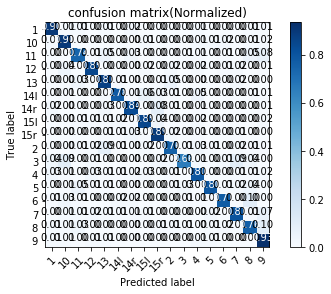

In [8]:
def get_predict(model,X):

    array_p=model.predict([X])
    predict=[np.argmax(i) for i in array_p]
    return  np.array(predict)

prd = get_predict(model,X_test)
pr.confuse_matrix_plot(y_test,prd,encoder.classes_,title="confusion matrix")

In [9]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model/model_pyther-107sample-178dp.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model/model_pyther-107sample-178dp.h5")
print("Saved model to disk")

Saved model to disk


# Test model

In [4]:
x=[]
y=[]
for sample_file in ["Gulthida.hkl","Vilai.hkl"]:
    d= hkl.load("Trimed data/"+sample_file)
    x.extend(d["data"])
    y.extend(d["label"])
    print("success : "+sample_file)

y=np.array(y)
y[y=="14left"]="14l"
y[y=="15left"]="15l"
y[y=="14right"]="14r"
y[y=="15right"]="15r"
encoder = preprocessing.LabelEncoder()
encoder.fit(y)
y_et  = encoder.transform(y)
lenghts = [len(x[i][0][0]) for i in range(len(x))]
x=[x[i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]
y_et =[y_et [i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]

success : Gulthida.hkl
success : Vilai.hkl


In [7]:
e=preprocessing.LabelEncoder()
e.fit(encoder.classes_)
e.classes_

array(['1', '10', '11', '12', '13', '14l', '14r', '15l', '15r', '2', '3',
       '4', '5', '6', '7', '8', '9'], dtype='<U3')

In [11]:
XL=np.array([sequence.pad_sequences(b[0], padding="post",maxlen=2000,dtype='float32')for b in x])
XR=np.array([sequence.pad_sequences(b[1], padding="post",maxlen=2000,dtype='float32')for b in x])
Xt =np.concatenate((XL[:,16:,534:712], XR[:,16:,534:712]), axis=1)

334/334 [==============================] - 0s 221us/step

acc: 96.41%
Confusion matrix, without normalization
[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 19  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0 19  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 19  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0 18  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  1  0 18  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0 18  1]
 [ 0  0  0  0  0  0  0  0 

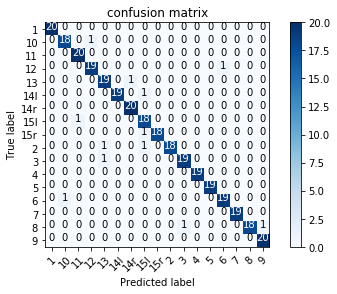

Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.  ]
 [0.   0.95 0.   0.05 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.  ]
 [0.   0.   0.   0.95 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.05
  0.   0.   0.  ]
 [0.   0.   0.   0.   0.95 0.   0.05 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.95 0.   0.05 0.   0.   0.   0.   0.   0.
  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.  ]
 [0.   0.   0.05 0.   0.   0.   0.   0.95 0.   0.   0.   0.   0.   0.
  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.05 0.95 0.   0.   0.   0.   0.
  0.   0.   0.  ]
 [0.   0.   0.   0.   0.05 0.   0.   0.05 0.   0.9  0.   0.   0.   0.
  0.   0.   0.  ]
 [0.   0.   0.   0.   0.05 0.   0.   0.   0.   0.   0.95 0.   0.   0.
  0.   0.   0.  ]
 [

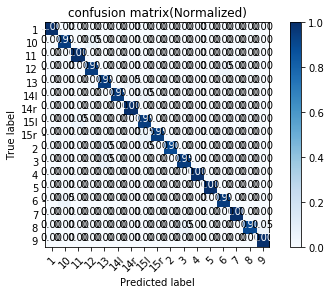

In [12]:
def get_predict(model,X):

    array_p=model.predict([X])
    predict=[np.argmax(i) for i in array_p]
    return  np.array(predict)

scores = model.evaluate([Xt], pd.get_dummies(y_et))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
prd = get_predict(model,Xt)
pr.confuse_matrix_plot(y_et,prd,encoder.classes_,title="confusion matrix")

In [13]:
def read_in_folder(folder_path,gesture_name):
    x=[]
    y=[]
    for file in os.listdir(folder_path):
        if( "-L-" in file): 
            L_hand_file=  folder_path +"/"+file
            R_hand_file=  folder_path +"/"+ re.sub(r"-L-","-R-",file)
            dL=pr.read_emg(L_hand_file).dropna().astype(float)
            dR=pr.read_emg(R_hand_file).dropna().astype(float)
            if(gesture_name=="0"):
                if(dL.Time.size>900):
                    T1 =  pr.find_active_time(dL.Time,dL.loc[:,['gx','gy','gz']])
                    T2 =  pr.find_active_time(dR.Time,dR.loc[:,['gx','gy','gz']])
                    if (len(T1)==2):
                        T = (np.array(T1)+np.array(T2))/2
                        Lhand = dL[dL.Time>=T[0]].T.values[1:]
                        Rhand = dR[dR.Time>=T[0]].T.values[1:]
                        x.append([Lhand,Rhand])
                        y.append(gesture_name)
            else:
                Lhand = dL.T.values[1:]
                Rhand = dR.T.values[1:]
                x.append([Lhand,Rhand])
                y.append(gesture_name)
            #print("success :"+L_hand_file+"__"+R_hand_file)
    return x,y
x = []
y = []
for n,sample in enumerate(["Gulthida","Vilai"]):

    if(os.path.isdir("Data/"+sample) and sample!=".ipynb_checkpoints"):
        for i in range(1,16):
            filename = "M"+str(i)+"-"+sample  
            if len(os.listdir("Data/"+sample+"/"+filename))==2:
                for fd in os.listdir("Data/"+sample+"/"+filename):
                    filepath="Data/"+sample+"/"+filename+"/"+fd+"/"
                    u,v = read_in_folder(filepath,str(i)+fd.lower())
                    x.extend(u)
                    y.extend(v)
            else:
                filepath="Data/"+sample+"/"+filename
                u,v = read_in_folder(filepath,str(i))
                x.extend(u)
                y.extend(v)

In [14]:
def preprocess(L,R,batch_size):
    l=sequence.pad_sequences(L, padding="post",maxlen=batch_size,dtype='float32')
    r=sequence.pad_sequences(R, padding="post",maxlen=batch_size,dtype='float32')
    return np.concatenate((l, r), axis=0)
    

In [98]:
from scipy import stats
import warnings
import time as t

warnings.filterwarnings('ignore')
batch_size=178
step_size=int(batch_size/2)
yy=[]
vv=[]
time = []
for record,label in zip(x,y):
    ans1=[]
    ans2=[]
    s = []
    if(record[0].shape[1]!=0):
        print("label : "+label)
        for index in range(0,record[0].shape[1],step_size):
            start_time = t.time()
            Lbatch = record[0][:,index:min(index+batch_size,record[0].shape[1])]
            Rbatch = record[1][:,index:min(index+batch_size,record[1].shape[1])]
            batch=preprocess(Lbatch[16:],Rbatch[16:],batch_size)
            batch=batch.reshape(1,batch.shape[0],batch.shape[1])
            stop = timeit.default_timer()
            time.append(t.time() - start_time) 
            ans1.append(model.predict([batch])[0])
            ans2.append(get_predict(model,batch)[0])
            #print(encoder.inverse_transform(get_predict(model,batch)))
            
        ge,count = stats.mode(ans2)
        p = np.sum(ans1,axis=0)    
        ge2, = np.where(p==p.max()) 
        yy.append(label)
        vv.append(encoder.inverse_transform(ge)[0])
        print("ans1 : "+str(encoder.inverse_transform(ge2))+"\nans2 : "+str(encoder.inverse_transform(ge))+" count : "+str(count[0])+"/"+str(len(ans2))+"\n")
    

label : 1
ans1 : ['14r']
ans2 : ['1'] count : 13/14

label : 1
ans1 : ['14r']
ans2 : ['1'] count : 11/15

label : 1
ans1 : ['1']
ans2 : ['1'] count : 14/15

label : 1
ans1 : ['1']
ans2 : ['1'] count : 14/16

label : 1
ans1 : ['14r']
ans2 : ['1'] count : 15/16

label : 1
ans1 : ['14r']
ans2 : ['1'] count : 15/16

label : 1
ans1 : ['6']
ans2 : ['1'] count : 14/16

label : 1
ans1 : ['1']
ans2 : ['1'] count : 14/16

label : 1
ans1 : ['1']
ans2 : ['1'] count : 14/15

label : 1
ans1 : ['1']
ans2 : ['1'] count : 13/14

label : 2
ans1 : ['4']
ans2 : ['1'] count : 6/23

label : 2
ans1 : ['2']
ans2 : ['2'] count : 11/20

label : 2
ans1 : ['15l']
ans2 : ['2'] count : 10/19

label : 2
ans1 : ['2']
ans2 : ['2'] count : 9/19

label : 2
ans1 : ['15l']
ans2 : ['2'] count : 10/18

label : 2
ans1 : ['14r']
ans2 : ['2'] count : 11/19

label : 2
ans1 : ['4']
ans2 : ['2'] count : 9/19

label : 2
ans1 : ['2']
ans2 : ['2'] count : 10/20

label : 2
ans1 : ['15l']
ans2 : ['2'] count : 11/18

label : 2
ans1 : [

ans1 : ['15l']
ans2 : ['15l'] count : 8/19

label : 15l
ans1 : ['15l']
ans2 : ['10'] count : 9/19

label : 15l
ans1 : ['14r']
ans2 : ['10'] count : 6/19

label : 15l
ans1 : ['15l']
ans2 : ['15l'] count : 9/19

label : 15l
ans1 : ['15l']
ans2 : ['10'] count : 7/19

label : 15r
ans1 : ['15l']
ans2 : ['15r'] count : 7/21

label : 15r
ans1 : ['15l']
ans2 : ['15r'] count : 7/19

label : 15r
ans1 : ['15l']
ans2 : ['15r'] count : 7/19

label : 15r
ans1 : ['15l']
ans2 : ['15r'] count : 8/20

label : 15r
ans1 : ['15l']
ans2 : ['9'] count : 5/20

label : 15r
ans1 : ['15l']
ans2 : ['15r'] count : 8/23

label : 15r
ans1 : ['15l']
ans2 : ['15r'] count : 8/19

label : 15r
ans1 : ['14r']
ans2 : ['15r'] count : 6/20

label : 15r
ans1 : ['15l']
ans2 : ['15r'] count : 8/20

label : 15r
ans1 : ['15l']
ans2 : ['15r'] count : 8/20

label : 1
ans1 : ['9']
ans2 : ['1'] count : 11/15

label : 1
ans1 : ['1']
ans2 : ['1'] count : 15/16

label : 1
ans1 : ['1']
ans2 : ['1'] count : 13/14

label : 1
ans1 : ['1']
a

ans1 : ['14r']
ans2 : ['14r'] count : 7/21

label : 14r
ans1 : ['14r']
ans2 : ['14r'] count : 8/20

label : 14r
ans1 : ['14r']
ans2 : ['14r'] count : 9/19

label : 14r
ans1 : ['14r']
ans2 : ['14r'] count : 6/20

label : 15l
ans1 : ['15l']
ans2 : ['15l'] count : 9/22

label : 15l
ans1 : ['15l']
ans2 : ['15l'] count : 9/22

label : 15l
ans1 : ['15l']
ans2 : ['15l'] count : 7/21

label : 15l
ans1 : ['1']
ans2 : ['8'] count : 5/21

label : 15l
ans1 : ['5']
ans2 : ['11'] count : 6/21

label : 15l
ans1 : ['6']
ans2 : ['11'] count : 9/20

label : 15l
ans1 : ['15l']
ans2 : ['15l'] count : 9/21

label : 15l
ans1 : ['14l']
ans2 : ['15l'] count : 8/20

label : 15l
ans1 : ['11']
ans2 : ['11'] count : 9/21

label : 15l
ans1 : ['15l']
ans2 : ['11'] count : 8/21

label : 15r
ans1 : ['8']
ans2 : ['15l'] count : 8/21

label : 15r
ans1 : ['11']
ans2 : ['8'] count : 6/21

label : 15r
ans1 : ['8']
ans2 : ['15r'] count : 5/20

label : 15r
ans1 : ['8']
ans2 : ['8'] count : 9/21

label : 15r
ans1 : ['8']
ans

In [94]:
print("--- %s seconds ---" % (np.mean(time)))

--- 0.00020094950478498688 seconds ---


In [76]:
np.max(ans,axis=0)

array([5.13e-07, 4.47e-07, 1.23e-03, 4.22e-08, 6.77e-08, 1.30e-07,
       5.13e-08, 9.46e-06, 8.90e-02, 1.36e-05, 3.94e-04, 6.96e-05,
       4.72e-02, 2.02e-07, 2.56e-07, 8.86e-04, 4.99e-06], dtype=float32)

In [82]:
ans!=np.max(ans,axis=0)

array([[False,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True, False,  True,
        False,  True,  True,  True,  True, False,  True, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True, False

In [80]:
[a[a!=a.max()]=0 for a in ans]

SyntaxError: invalid syntax (<ipython-input-80-b9ca731c27c9>, line 1)

Confusion matrix, without normalization
[[17  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  1]
 [ 0 18  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0]
 [ 0  4  3  2  1  0  0  6  0  0  0  0  3  1  0  0  0]
 [ 0  1  0 10  0  0  3  5  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  6  0  5  3  0  1  0  3  0  1  0  0  0]
 [ 0  0  7  0  0  1  2  7  1  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  1  0  0  0  1  0  0  0]
 [ 1  4  1  0  0  1  0 11  0  0  1  0  0  1  0  0  0]
 [ 0  0  2  0  0  0  2  8  4  0  0  0  0  0  0  4  0]
 [ 1  0  1  0  2  0  0  1  0  8  2  4  1  0  0  0  0]
 [ 3  0  2  1  0  0  2  1  0  2  8  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1  5  1  1  0  6  0  1  2  2  1]
 [ 0  3  0  1  0  0  1  4  0  2  0  0  9  0  0  0  0]
 [ 0  1  0  0  0  0  1  5  0  0  0  0  0 11  2  0  0]
 [ 0  0  0  0  0  0  3  3  2  0  1  2  1  0  8  0  0]
 [ 2  0  0  0  0  1  3  2  2  0  0  0  0  0  0 10  0]
 [ 2  1  0  0  0  0  2  1  2  0  0  1  0  4  0  3  4]]


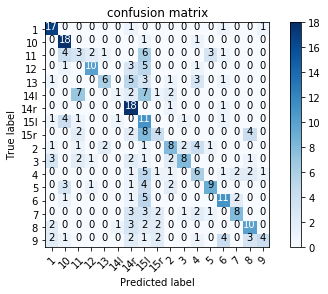

Normalized confusion matrix
[[0.85 0.   0.   0.   0.   0.   0.05 0.   0.   0.   0.   0.   0.   0.05
  0.   0.   0.05]
 [0.   0.9  0.   0.   0.   0.   0.   0.05 0.   0.   0.   0.05 0.   0.
  0.   0.   0.  ]
 [0.   0.2  0.15 0.1  0.05 0.   0.   0.3  0.   0.   0.   0.   0.15 0.05
  0.   0.   0.  ]
 [0.   0.05 0.   0.5  0.   0.   0.15 0.25 0.   0.   0.   0.05 0.   0.
  0.   0.   0.  ]
 [0.05 0.   0.   0.   0.3  0.   0.25 0.15 0.   0.05 0.   0.15 0.   0.05
  0.   0.   0.  ]
 [0.   0.   0.35 0.   0.   0.05 0.1  0.35 0.05 0.1  0.   0.   0.   0.
  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.9  0.   0.   0.05 0.   0.   0.   0.05
  0.   0.   0.  ]
 [0.05 0.2  0.05 0.   0.   0.05 0.   0.55 0.   0.   0.05 0.   0.   0.05
  0.   0.   0.  ]
 [0.   0.   0.1  0.   0.   0.   0.1  0.4  0.2  0.   0.   0.   0.   0.
  0.   0.2  0.  ]
 [0.05 0.   0.05 0.   0.1  0.   0.   0.05 0.   0.4  0.1  0.2  0.05 0.
  0.   0.   0.  ]
 [0.15 0.   0.1  0.05 0.   0.   0.1  0.05 0.   0.1  0.4  0.   0.   0.
  0.   0.05 

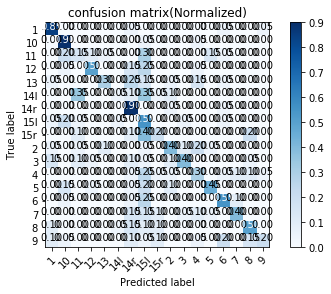

             precision    recall  f1-score   support

          1       0.63      0.85      0.72        20
         10       0.56      0.90      0.69        20
         11       0.19      0.15      0.17        20
         12       0.71      0.50      0.59        20
         13       0.67      0.30      0.41        20
        14l       0.33      0.05      0.09        20
        14r       0.41      0.90      0.56        20
        15l       0.17      0.55      0.27        20
        15r       0.33      0.20      0.25        20
          2       0.47      0.40      0.43        20
          3       0.67      0.40      0.50        20
          4       0.33      0.30      0.32        20
          5       0.64      0.45      0.53        20
          6       0.52      0.55      0.54        20
          7       0.67      0.40      0.50        20
          8       0.50      0.50      0.50        20
          9       0.67      0.20      0.31        20

avg / total       0.50      0.45      0.43  

In [65]:
from sklearn.metrics import classification_report
pr.confuse_matrix_plot(encoder.transform(yy),encoder.transform(vv),encoder.classes_,title="confusion matrix")
print(classification_report(encoder.transform(yy),encoder.transform(vv), target_names=encoder.classes_))

Confusion matrix, without normalization
[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  3  0  0  0  0  0  2  0  0  0  0]
 [ 0  2 17  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  1 16  0  0  2  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  1  0 14  0  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  9  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0 17  0  0  0  0  1  0  2  0  0  0]
 [ 0  6  6  0  0  0  1  5  0  0  0  0  0  1  0  1  0]
 [ 0  1  2  0  0  0  1  1 13  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  1  0 19  0  0  0  0  0  0  0]
 [ 2  0  2  0  0  0  0  0  0  0 15  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  0  1 17  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0 12  2  1  2  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  1  2  0 16  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  1  0  0  2 14  2]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  3 16]]


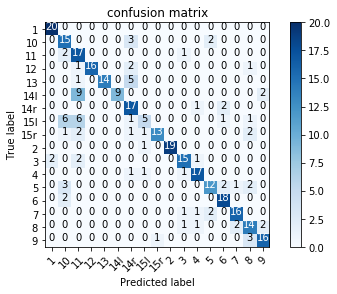

Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.  ]
 [0.   0.75 0.   0.   0.   0.   0.15 0.   0.   0.   0.   0.   0.1  0.
  0.   0.   0.  ]
 [0.   0.1  0.85 0.   0.   0.   0.   0.   0.   0.   0.05 0.   0.   0.
  0.   0.   0.  ]
 [0.   0.   0.05 0.8  0.   0.   0.1  0.   0.   0.   0.   0.   0.   0.
  0.   0.05 0.  ]
 [0.   0.   0.05 0.   0.7  0.   0.25 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.  ]
 [0.   0.   0.45 0.   0.   0.45 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.1 ]
 [0.   0.   0.   0.   0.   0.   0.85 0.   0.   0.   0.   0.05 0.   0.1
  0.   0.   0.  ]
 [0.   0.3  0.3  0.   0.   0.   0.05 0.25 0.   0.   0.   0.   0.   0.05
  0.   0.05 0.  ]
 [0.   0.05 0.1  0.   0.   0.   0.05 0.05 0.65 0.   0.   0.   0.   0.
  0.   0.1  0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.05 0.   0.95 0.   0.   0.   0.
  0.   0.   0.  ]
 [0.1  0.   0.1  0.   0.   0.   0.   0.   0.   0.   0.75 0.05 0.   0.
  0.   0.   0.  ]
 

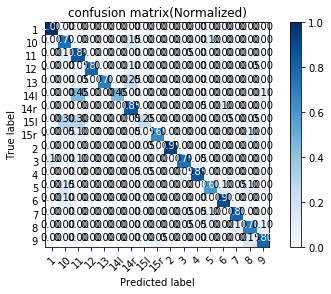

             precision    recall  f1-score   support

          1       0.91      1.00      0.95        20
         10       0.52      0.75      0.61        20
         11       0.45      0.85      0.59        20
         12       1.00      0.80      0.89        20
         13       1.00      0.70      0.82        20
        14l       1.00      0.45      0.62        20
        14r       0.57      0.85      0.68        20
        15l       0.62      0.25      0.36        20
        15r       0.93      0.65      0.76        20
          2       1.00      0.95      0.97        20
          3       0.79      0.75      0.77        20
          4       0.81      0.85      0.83        20
          5       0.75      0.60      0.67        20
          6       0.78      0.90      0.84        20
          7       0.84      0.80      0.82        20
          8       0.61      0.70      0.65        20
          9       0.80      0.80      0.80        20

avg / total       0.79      0.74      0.74  

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
pr.confuse_matrix_plot(encoder.transform(yy),encoder.transform(vv),encoder.classes_,title="confusion matrix")
print(classification_report(encoder.transform(yy),encoder.transform(vv), target_names=encoder.classes_))
print(accuracy_score(encoder.transform(yy),encoder.transform(vv)))

Confusion matrix, without normalization
[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  3  0  0  0  0  0  1  0  0  0  0]
 [ 0  2 17  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  4  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0 15  0  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  6  1  0  0  0  0  0  0  0  0  0  3]
 [ 0  0  0  0  0  0 18  0  0  0  0  1  0  1  0  0  0]
 [ 0  3  6  0  0  0  1  9  0  0  0  0  0  1  0  0  0]
 [ 0  1  0  0  0  0  0  1 16  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  1  0 19  0  0  0  0  0  0  0]
 [ 3  0  1  0  0  0  0  0  0  0 16  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  0  0 18  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0  0  0 11  1  2  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  1  0  1  0 17  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  1 17  1]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 19]]


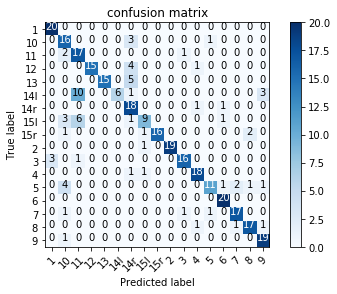

Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.  ]
 [0.   0.8  0.   0.   0.   0.   0.15 0.   0.   0.   0.   0.   0.05 0.
  0.   0.   0.  ]
 [0.   0.1  0.85 0.   0.   0.   0.   0.   0.   0.   0.05 0.   0.   0.
  0.   0.   0.  ]
 [0.   0.   0.   0.75 0.   0.   0.2  0.   0.   0.   0.   0.05 0.   0.
  0.   0.   0.  ]
 [0.   0.   0.   0.   0.75 0.   0.25 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.  ]
 [0.   0.   0.5  0.   0.   0.3  0.05 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.15]
 [0.   0.   0.   0.   0.   0.   0.9  0.   0.   0.   0.   0.05 0.   0.05
  0.   0.   0.  ]
 [0.   0.15 0.3  0.   0.   0.   0.05 0.45 0.   0.   0.   0.   0.   0.05
  0.   0.   0.  ]
 [0.   0.05 0.   0.   0.   0.   0.   0.05 0.8  0.   0.   0.   0.   0.
  0.   0.1  0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.05 0.   0.95 0.   0.   0.   0.
  0.   0.   0.  ]
 [0.15 0.   0.05 0.   0.   0.   0.   0.   0.   0.   0.8  0.   0.   0.
  0.   0.   0.  ]


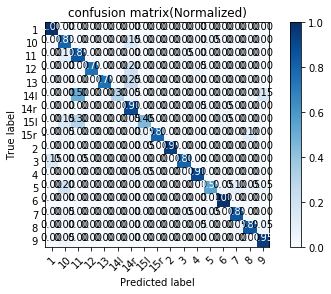

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        20
         10       0.57      0.80      0.67        20
         11       0.50      0.85      0.63        20
         12       1.00      0.75      0.86        20
         13       1.00      0.75      0.86        20
        14l       1.00      0.30      0.46        20
        14r       0.55      0.90      0.68        20
        15l       0.75      0.45      0.56        20
        15r       1.00      0.80      0.89        20
          2       1.00      0.95      0.97        20
          3       0.89      0.80      0.84        20
          4       0.86      0.90      0.88        20
          5       0.85      0.55      0.67        20
          6       0.87      1.00      0.93        20
          7       0.85      0.85      0.85        20
          8       0.85      0.85      0.85        20
          9       0.79      0.95      0.86        20

avg / total       0.83      0.79      0.79  

In [97]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
pr.confuse_matrix_plot(encoder.transform(yy),encoder.transform(vv),encoder.classes_,title="confusion matrix")
print(classification_report(encoder.transform(yy),encoder.transform(vv), target_names=encoder.classes_))
print(accuracy_score(encoder.transform(yy),encoder.transform(vv)))

In [115]:
# serialize model to JSON
model_json = model.to_json()
with open("model/model_pyther-20sample-178dp.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model/model_pyther-20sample-178dp.h5")
print("Saved model to disk")


Saved model to disk
